# 머신러닝 프로젝트

## Airbnb (New York City)
- 미국 NYC Airbnb 목록(2019)
- 데이터 출처:https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data (License CC0: Public Domain)
- 프로젝트 목적: 가격 예측(price)
- 제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
- 평가 방식: MSE


In [1]:
# 라이브러리 
import pandas as pd

In [2]:
# 데이터 불러오기
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

## EDA

In [3]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


## 데이터 전처리

In [5]:
# Importing necessary libraries for analysing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# 결측치 컬럼 삭제 (last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [7]:
# 결측치 채우기
train['reviews_per_month'].fillna(0, inplace = True)
test['reviews_per_month'].fillna(0, inplace = True)

train.fillna('Absent', inplace = True)
test.fillna('Absent', inplace = True)

In [8]:
# 결측치 확인
train.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
train.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [10]:
train.nunique()

id                                39116
name                              38421
host_id                           30845
host_name                          9978
neighbourhood_group                   5
neighbourhood                       221
latitude                          17408
longitude                         13621
room_type                             3
price                               645
minimum_nights                      101
number_of_reviews                   379
reviews_per_month                   899
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## Feature 분석

### Target

- 가격 데이터가 너무 한 쪽으로 치우쳐져 있으므로 log 변환을 한 뒤에 예측을 하고 값을 다시 되돌려준다

In [11]:
# 가격 값 복사
target = train['price']
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,0.00,1,0


<AxesSubplot:>

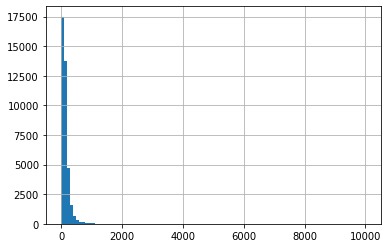

In [12]:
target.hist(bins=100)

In [13]:
print(target[:3])
print(np.log1p(target[:3]))
print(np.expm1(np.log1p(target)[:3]))

0     70
1    240
2    150
Name: price, dtype: int64
0    4.262680
1    5.484797
2    5.017280
Name: price, dtype: float64
0     70.0
1    240.0
2    150.0
Name: price, dtype: float64


<AxesSubplot:>

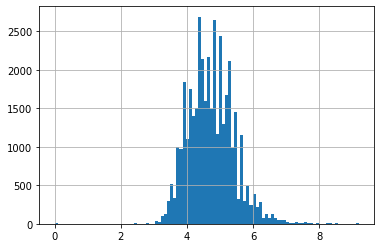

In [14]:
target = np.log1p(target)
target.hist(bins=100)

- 로그변환후 값이 정규분포에 가까워진 것을 볼 수 있다

### 위도, 경도 활용

- folium을 통해 지도에 시각화 하려 하였으나 구역이 제한적이고 표현이 어려울 것 같아서 scatterplot에 시각화를 하였다

In [15]:
# !pip install folium
# import folium

# m = folium.Map(location=[n_train.latitude[0], n_train.longitude[0]], zoom_start=14)
# m

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

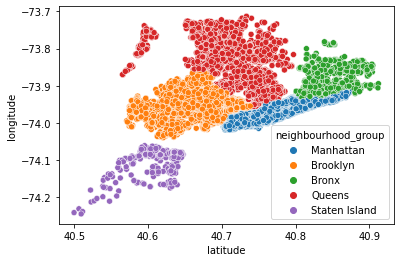

In [17]:
sns.scatterplot(x='latitude', y='longitude', data=train, hue='neighbourhood_group')

- 위도와 경도에 대한 정보가 neighbourhood_group의 정보와 겹치고 오히려 가격을 예측하는 데에 neighbourhood_group 정보가 유용할 것이라 생각되어 위도와 경도는 제거를 고려해봐도 좋을 것 같다

## neighbourhood_group 별 차이 시각화
- 위 데이터는 지리적 위치를 나타내는 피처들이 많이 존재한다. 그중에 neighbourhood_group이 5개로 나뉘어져 있어서 시각화 하기 좋다
- 피처의 frequency가 너무 크면 예측하는 데 유용하지 않을 가능성이 높으므로 제거하거나 합쳐주는 작업들이 필요하다
    - neighbourhood가 합쳐져서 neighbourhood_group이 된 것으로 보이므로 neighbourhood 피처를 제거한다

In [18]:
data = train.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by='count', ascending = False)
data.head()

,neighbourhood_group,count
2,Manhattan,17331
1,Brooklyn,16081
3,Queens,4530
0,Bronx,884
4,Staten Island,290


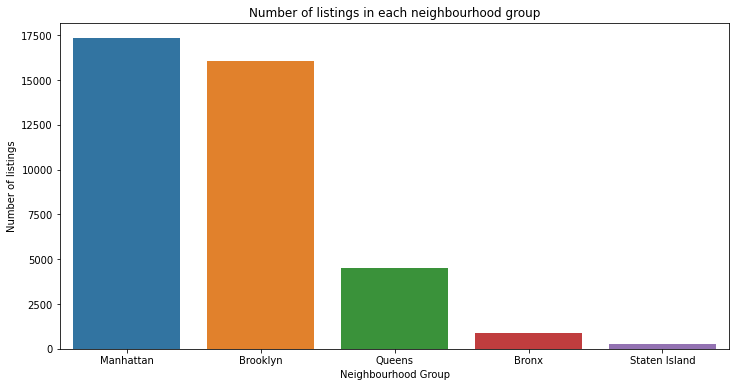

In [19]:
plt.rcParams['figure.figsize'] = (12,6)
ax = sns.barplot(x = data['neighbourhood_group'], y = data['count'], data = data)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()

In [20]:
# Finding which neighbourhood has got maximum number of reviews. 
areas_reviews = train.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
areas_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
0,Bronx,321
4,Staten Island,242


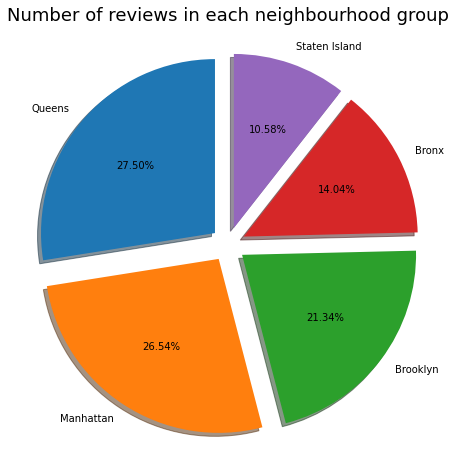

In [21]:
# Visualising the number of reviews in each neighbourhood group through pie chart
plt.rcParams['figure.figsize'] = (13,8)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 18})
plt.show()

### 가격 분포

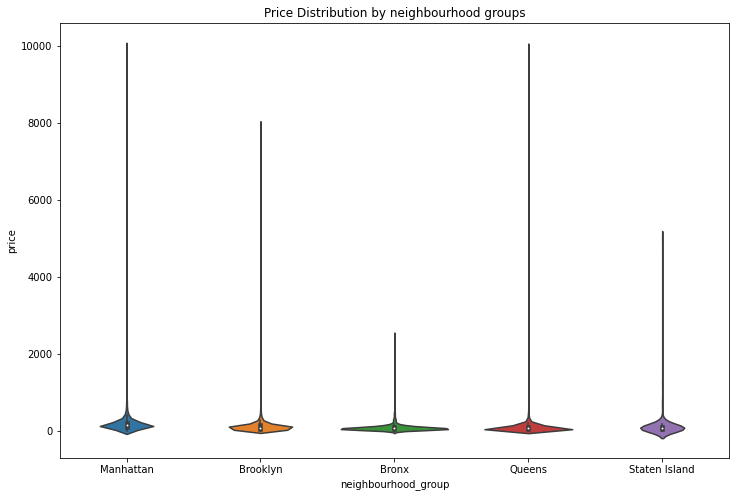

In [22]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=train).set_title('Price Distribution by neighbourhood groups')
plt.show()

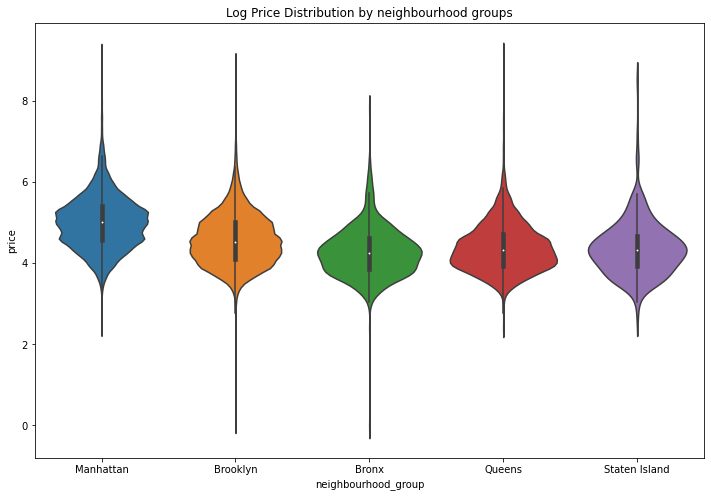

In [23]:
# Now lets see the price distribution by neighbourhood gropus
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="neighbourhood_group", y=np.log1p(train.price), data=train).set_title('Log Price Distribution by neighbourhood groups')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


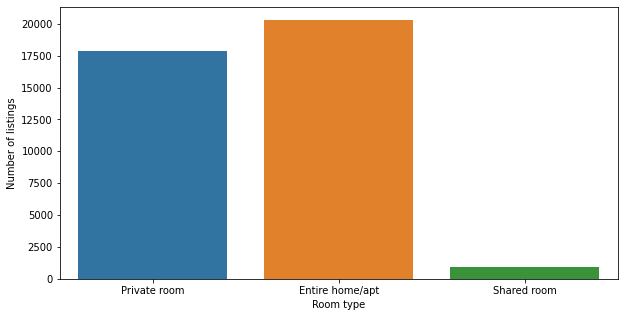

In [24]:
# Plotting histogram for room types to look for which are most preferred room types.
plt.rcParams['figure.figsize'] = (10,5)
hp = sns.countplot(train['room_type'])
hp.set_xlabel('Room type') 
hp.set_ylabel('Number of listings')
plt.show()

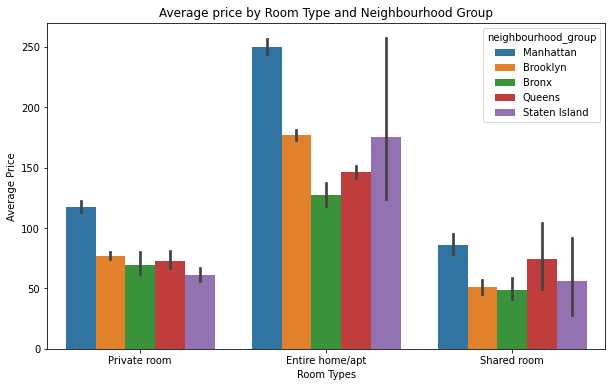

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x = train['room_type'], y = train['price'], hue = train['neighbourhood_group'])
plt.title('Average price by Room Type and Neighbourhood Group')
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.show()

### 가장 많이 등록된 neighbourhood 10개를 시각화 해보고자 한다

In [26]:
df1 = train.groupby(['neighbourhood'])['id'].count().nlargest(10)
df1

neighbourhood
Williamsburg          3099
Bedford-Stuyvesant    2953
Harlem                2114
Bushwick              1981
Hell's Kitchen        1557
Upper West Side       1529
East Village          1463
Upper East Side       1435
Crown Heights         1251
Midtown               1240
Name: id, dtype: int64

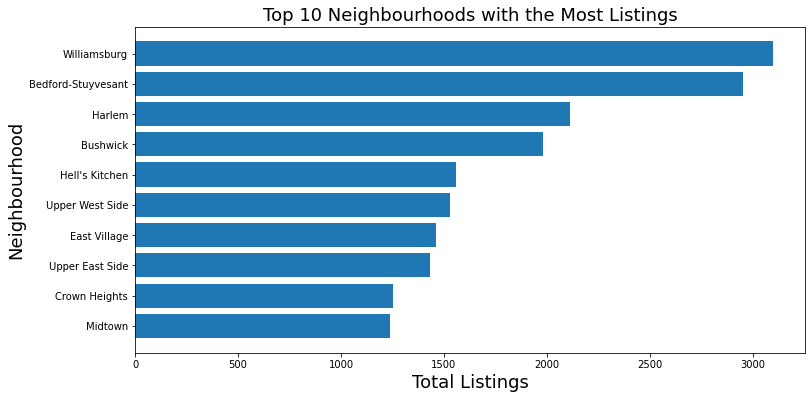

In [27]:
# Visualizing the top 10 neighbourhood listings through bar plot
plt.figure(figsize=(12,6))
x = list(df1.index)
y = list(df1.values)
x.reverse()
y.reverse()

plt.title("Top 10 Neighbourhoods with the Most Listings", {'fontsize':18})
plt.ylabel("Neighbourhood", {'fontsize':18})
plt.xlabel("Total Listings", {'fontsize':18})

plt.barh(x, y)
plt.show()

In [28]:
train.groupby(['neighbourhood_group', 'neighbourhood', 'room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
390,Queens,Jamaica,Private room,629
267,Manhattan,Harlem,Private room,607
361,Queens,East Elmhurst,Private room,543
282,Manhattan,Lower East Side,Private room,540
209,Brooklyn,Park Slope,Entire home/apt,488
371,Queens,Flushing,Private room,474
225,Brooklyn,South Slope,Entire home/apt,467
253,Manhattan,East Village,Private room,451
312,Manhattan,Tribeca,Entire home/apt,447
436,Queens,Springfield Gardens,Entire home/apt,434


## 수치형 변수

In [29]:
train.host_name.value_counts()

Michael         338
David           324
Sonder (NYC)    256
Alex            232
John            220
               ... 
Tanjila           1
Fozia             1
Aurelien          1
Wilfredo          1
Tola              1
Name: host_name, Length: 9978, dtype: int64

In [30]:
train.host_id.value_counts().describe()

count    30845.000000
mean         1.268147
std          2.404587
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        256.000000
Name: host_id, dtype: float64

- host_name과 host_id 모두 변수로써 큰 의미가 없어보인다
- frequency가 너무 크기 때문 (unique 값이 너무 많다)
- host_name은 동명이인일 가능성이 높아보임
- 변수를 통해 파생변수 생성하여 사용

In [31]:
# 수치형 데이터와 범주형 데이터 분리 
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()
n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()

In [32]:
n_train.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [33]:
n_train.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,94219511,40.80167,-73.95781,70,3,3,0.09,2,0
1,9458704,49015331,40.76037,-73.99016,240,2,64,1.68,2,262
2,26871281,440022,40.73001,-74.00562,150,60,1,0.20,1,0
3,698132,3577509,40.69128,-73.93653,85,4,239,2.89,2,1
4,15783953,12475280,40.68899,-73.95555,44,28,0,0.00,1,0


### 수치형 변수와 target 값과의 상관관계 분석

<AxesSubplot:>

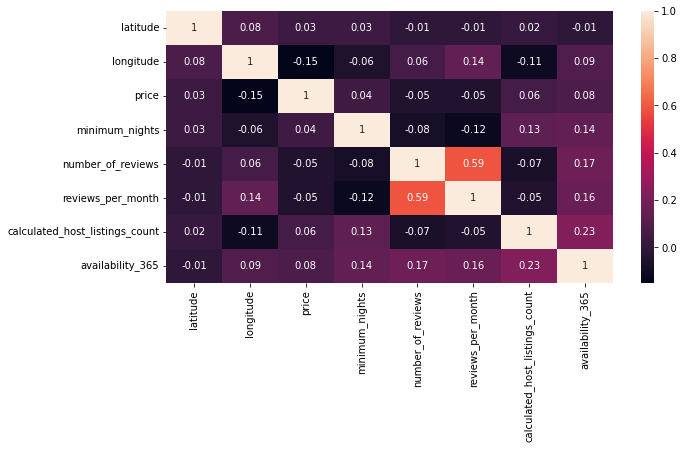

In [34]:
sns.heatmap(n_train.loc[:,n_train.columns.str.contains('id') == False].corr().round(2), annot=True)

In [35]:
n_train['price'] = np.log1p(n_train['price'])

<AxesSubplot:>

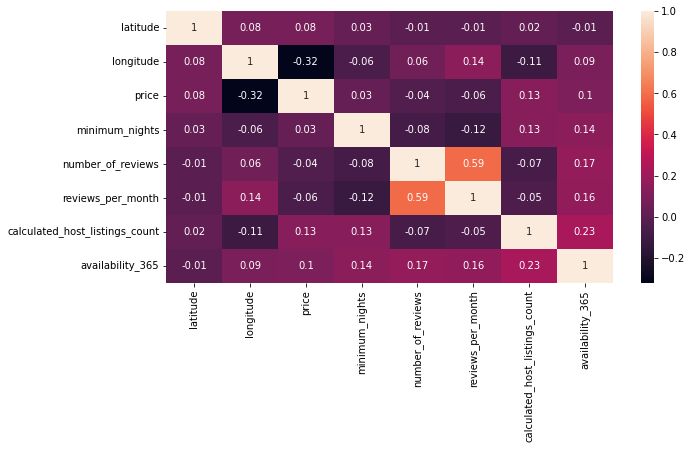

In [36]:
sns.heatmap(n_train.loc[:,n_train.columns.str.contains('id') == False].corr().round(2), annot=True)

- `target값과 변수 간의 상관관계`
    - price와 longitude의 상관관계가 상당히 높은 것으로 보아 경도 관련 변수를 제거하면 예측력이 낮아질 수도 있을 것으로 보인다
- `변수들 간의 상관관계`
    - number_of_reviews와 reviews_per_month간의 상관관계가 높다. (0.59)
    - 이는 review에 대한 정보이므로 상관관계가 높을 수 밖에 없는 변수이다.
    - 둘 중 하나의 변수를 사용하거나 PCA 등의 방법을 통해 변수를 축소시킨다

In [37]:
n_train.drop('price', axis=1, inplace=True)

In [38]:
n_train.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,94219511,40.80167,-73.95781,3,3,0.09,2,0
1,9458704,49015331,40.76037,-73.99016,2,64,1.68,2,262
2,26871281,440022,40.73001,-74.00562,60,1,0.20,1,0
3,698132,3577509,40.69128,-73.93653,4,239,2.89,2,1
4,15783953,12475280,40.68899,-73.95555,28,0,0.00,1,0


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

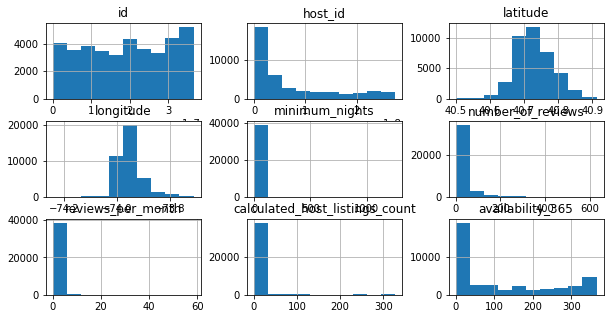

In [39]:
n_train.hist()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

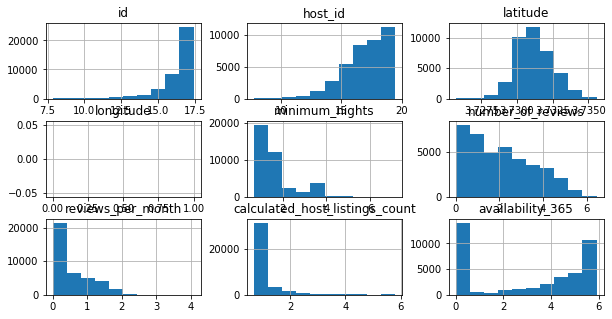

In [40]:
np.log1p(n_train).hist()

In [41]:
n_train.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### 예측력을 높이기 위해 skewness가 높아보이는 데이터들의 경우는 log변환을 해준다

In [42]:
log_cols = ['minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']

n_train[log_cols] = np.log1p(n_train[log_cols])
n_test[log_cols] = np.log1p(n_test[log_cols])

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

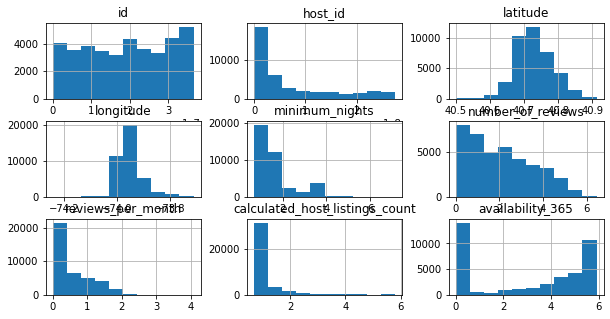

In [44]:
n_train.hist()

In [45]:
n_train.drop(['id','host_id'], axis=1, inplace=True)
n_test.drop(['id','host_id'], axis=1, inplace=True)

In [46]:
# 수치형 변수
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [47]:
cols = n_train.columns

In [48]:
n_train = scaler.fit_transform(n_train)
n_test = scaler.transform(n_test)

n_train = pd.DataFrame(n_train, columns = cols)
n_test = pd.DataFrame(n_test, columns = cols)

## 범주형 변수

- 에어비엔비 사용자라고 생각했을 때 아무래도 name이 수요(인기도)에 영향을 미치기도 할 것이고 가격 예측의 중요한 요인으로 보여진다
- `name` 피처 : 자연어 처리를 통해 300개의 피처로 백터화 후 칼럼으로 이용한다

In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud

In [50]:
c_train

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room
1,"Large 1BR Apartment, near Times Sq (2nd Floor)",Iradj,Manhattan,Hell's Kitchen,Entire home/apt
2,West Village Apartment,Petter,Manhattan,West Village,Entire home/apt
3,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",Eric,Brooklyn,Bedford-Stuyvesant,Entire home/apt
4,"Sun-drenched apartment, 20 mins to Manhattan",George,Brooklyn,Bedford-Stuyvesant,Private room
...,...,...,...,...,...
39111,Stylish studio by Fulton station,Jessie,Manhattan,Financial District,Entire home/apt
39112,"Comfortable- JFK,LGA Best Value",Shared Stay-JFK The Hugh Suite,Queens,Springfield Gardens,Private room
39113,"Sunny, Accessible, UES Apt - Summer in the City",Tola,Manhattan,Upper East Side,Entire home/apt
39114,1 BR Village - 30 day+ stay,Alexandra,Manhattan,Greenwich Village,Entire home/apt


In [51]:
def remove_characters(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in word_tokenize(text) if word.lower() not in stop_words]
    return ' '.join(tokens)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
    return ' '.join(lemmatized_tokens)


In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
# text preprocessing

c_train['name'].fillna('', inplace=True)
c_train['name'] = c_train['name'].apply(lambda x: x.lower())
c_train['name'] = c_train['name'].apply(lambda x: remove_stopwords(x))
c_train['name'] = c_train['name'].apply(lambda x: remove_characters(x))

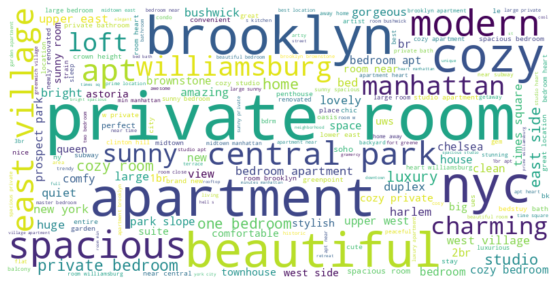

In [55]:
# wordcloud representation
corpus = ' '.join(c_train['name'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Extracting features/vectors

In [56]:
!pip uninstall spacy -y

Found existing installation: spacy 3.7.4
Uninstalling spacy-3.7.4:
  Successfully uninstalled spacy-3.7.4


In [57]:
!pip install spacy
!python -m spacy download en_core_web_md

  Using cached spacy-3.7.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 20.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [58]:
import spacy

In [60]:
# feature engineering
nlp = spacy.load('en_core_web_md')

c_train['vectors'] = c_train['name'].apply(lambda x:nlp(x).vector)
c_test['vectors'] = c_test['name'].apply(lambda x:nlp(x).vector)

In [63]:
v_train = c_train['vectors'].copy()
v_test = c_test['vectors'].copy()

- 나머지 범주형 변수들은 label encoding을 진행한다.

In [64]:
# 범주형 변수
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type'
        ]

for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])

del_cols =['name','host_name']
c_train = c_train.drop(del_cols, axis=1)
c_test = c_test.drop(del_cols, axis=1)

## 분리한 데이터 다시 합침

In [65]:
xf = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
print(train.shape, test.shape)
train.head()

(39116, 11) (9779, 11)


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type,vectors
0,0.731742,0.539318,0.107656,0.215072,0.021091,0.079505,0.000000,2,94,1,"[-0.65585, 2.5242662, -2.6935666, -0.97073, 2...."
1,0.631633,0.478445,0.062975,0.647622,0.241268,0.079505,0.944012,2,95,0,"[2.258348, 1.5413511, -5.82582, -0.489834, 0.2..."
2,0.558041,0.449354,0.530822,0.107536,0.044621,0.000000,0.000000,2,209,0,"[-2.6774065, 0.0647, -0.7814867, -1.3019799, 1..."
3,0.464162,0.579361,0.142313,0.850276,0.332456,0.079505,0.117430,1,13,0,"[0.11697831, -0.74960166, -1.5734566, 0.388413..."
4,0.458611,0.543571,0.415334,0.000000,0.000000,0.000000,0.000000,1,13,1,"[-0.3337933, -2.035135, -0.68892, 0.38486, 1.7..."


In [69]:
train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type,vectors
0,0.731742,0.539318,0.107656,0.215072,0.021091,0.079505,0.000000,2,94,1,"[-0.65585, 2.5242662, -2.6935666, -0.97073, 2...."
1,0.631633,0.478445,0.062975,0.647622,0.241268,0.079505,0.944012,2,95,0,"[2.258348, 1.5413511, -5.82582, -0.489834, 0.2..."
2,0.558041,0.449354,0.530822,0.107536,0.044621,0.000000,0.000000,2,209,0,"[-2.6774065, 0.0647, -0.7814867, -1.3019799, 1..."
3,0.464162,0.579361,0.142313,0.850276,0.332456,0.079505,0.117430,1,13,0,"[0.11697831, -0.74960166, -1.5734566, 0.388413..."
4,0.458611,0.543571,0.415334,0.000000,0.000000,0.000000,0.000000,1,13,1,"[-0.3337933, -2.035135, -0.68892, 0.38486, 1.7..."


In [66]:
target

0        4.262680
1        5.484797
2        5.017280
3        4.454347
4        3.806662
           ...   
39111    5.225747
39112    3.931826
39113    4.795791
39114    5.111988
39115    5.303305
Name: price, Length: 39116, dtype: float64

In [70]:
df = train.copy()
df['price'] = target

In [71]:
# splitting dat into dependent and independent variables
X = df[['neighbourhood_group', 'room_type', 'minimum_nights',
        'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']]
y = df['price']

In [72]:
text_vector_dimensions = pd.DataFrame(df['vectors'].to_list(), columns=[f'text_dim_{i}' for i in range(300)])  # Assuming 300 dimensions
X = pd.concat([X, text_vector_dimensions], axis=1)

In [74]:
X_test = test[['neighbourhood_group', 'room_type', 'minimum_nights',
        'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']]
text_vector_dimensions = pd.DataFrame(test['vectors'].to_list(), columns=[f'text_dim_{i}' for i in range(300)])  # Assuming 300 dimensions
X_test = pd.concat([X_test, text_vector_dimensions], axis=1)

In [75]:
X.shape, X_test.shape

((39116, 307), (9779, 307))

## 검증 데이터 분리

In [77]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 307), (7824, 307), (31292,), (7824,))

## 머신러닝

In [78]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

19276.500850098375

In [79]:
# Ridge
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

pred=ridge.predict(X_val)
pred = np.expm1(pred)
mean_squared_error(y_val, pred)

19273.70025825812

In [80]:
# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(X_train, y_train)

pred = lasso.predict(X_val)
pred = np.expm1(pred)
mean_squared_error(y_val, pred)

11756.150907432313

In [81]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(random_state=2022, n_estimators=200)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

20692.466925516008

In [82]:
# Xgboost
from xgboost import XGBRegressor
xgb_model = XGBRegressor(max_depth=10,
                     learning_rate=0.02,
                     n_estimators=500,
                     random_state=2022)

xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


20993.945255966122

In [ ]:
# # 라이브러리 불러오기
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터
# params={'learning_rate':[0.07, 0.05], 
#         'max_depth':[3, 5, 7], 
#         'n_estimators':[100, 200],
#         'subsample':[0.9, 0.8, 0.7]
#         }

# # GridSearchCV
# grid = GridSearchCV(xgb_model, params, cv=3, n_jobs=-1)
# grid.fit(train, target)

In [ ]:
# 최적의 하이퍼 파라미터를 찾음
# grid.best_params_

## 채점
- test 결과와 validation 결과가 너무 많이 달라서 train, validation과 test 데이터간의 차이가 큰 것 같음

In [85]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('../data/y_test.csv')

# lasso
pred = lasso.predict(X_test)
pred = np.expm1(pred)

mean_squared_error(y_test, pred)

56148.41872388476

In [86]:
# Xgboost
pred = xgb_model.predict(X_test)
pred = np.expm1(pred)

mean_squared_error(y_test, pred)

48022.28519283713